In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Pr_CSV_Files/AcademicPerformance_New.csv')

In [3]:
df.head()

,Roll No,NationalITy,WT,DSBDA,AI,Average,Grade,PG
0,1.0,India,72.0,72.0,74.0,72.666667,C,Yes
1,2.0,Japan,69.0,90.0,NaN,53.000000,B,No
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,China,47.0,NaN,44.0,30.333333,D,Yes
4,5.0,India,76.0,78.0,NaN,51.333333,C,No


In [4]:
df.tail()

,Roll No,NationalITy,WT,DSBDA,AI,Average,Grade,PG
94,95.0,USA,79.0,NaN,NaN,26.333333,A,No
95,96.0,Japan,78.0,81.0,82.0,80.333333,A,No
96,97.0,USA,65.0,66.0,62.0,64.333333,B,No
97,98.0,Rassia,63.0,72.0,70.0,68.333333,B,Yes
98,99.0,India,58.0,67.0,NaN,41.666667,B,No


In [5]:
df.describe()

,Roll No,WT,DSBDA,AI,Average
count,98.000000,91.000000,95.000000,89.000000,98.000000
mean,50.479592,61.164835,64.652632,62.235955,58.663265
std,28.469274,14.995009,14.893072,16.216590,16.518482
min,1.000000,18.000000,26.000000,20.000000,26.000000
25%,26.250000,51.000000,54.500000,52.000000,45.250000
50%,50.500000,63.000000,66.000000,63.000000,59.333333
75%,74.750000,71.000000,74.000000,74.000000,71.916667
max,99.000000,97.000000,95.000000,92.000000,91.666667


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Roll No      98 non-null     float64
 1   NationalITy  98 non-null     object 
 2   WT           91 non-null     float64
 3   DSBDA        95 non-null     float64
 4   AI           89 non-null     float64
 5   Average      98 non-null     float64
 6   Grade        98 non-null     object 
 7   PG           98 non-null     object 
dtypes: float64(5), object(3)
memory usage: 6.3+ KB


In [7]:
df.isnull()

,Roll No,NationalITy,WT,DSBDA,AI,Average,Grade,PG
0,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False
2,True,True,True,True,True,True,True,True
3,False,False,False,True,False,False,False,False
4,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...
94,False,False,False,True,True,False,False,False
95,False,False,False,False,False,False,False,False
96,False,False,False,False,False,False,False,False
97,False,False,False,False,False,False,False,False


In [8]:
df.isnull().sum()

Roll No         1
NationalITy     1
WT              8
DSBDA           4
AI             10
Average         1
Grade           1
PG              1
dtype: int64

In [9]:
df.dropna(subset = ['Roll No'], inplace = True)

In [10]:
df['WT'] = df['WT'].fillna(df['WT'].mean())

In [11]:
df['DSBDA'] = df['DSBDA'].fillna(df['DSBDA'].mean())

In [12]:
df['AI'] = df['AI'].fillna(df['AI'].mean())

In [13]:
df.isnull().sum()

Roll No        0
NationalITy    0
WT             0
DSBDA          0
AI             0
Average        0
Grade          0
PG             0
dtype: int64

In [14]:
#datatypes

In [15]:
df['Roll No'].astype(int)

0      1
1      2
3      4
4      5
5      6
      ..
94    95
95    96
96    97
97    98
98    99
Name: Roll No, Length: 98, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x7f446c2a4550>,
 'caps': [<matplotlib.lines.Line2D at 0x7f446c2a47d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f446c2a4410>],
 'medians': [<matplotlib.lines.Line2D at 0x7f446c2a4a50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f446c2a4b90>],
 'means': []}

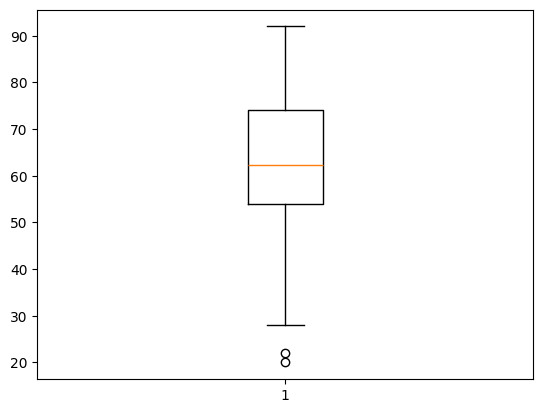

In [17]:
#Plotting outliers
plt.boxplot(df['AI'])


In [18]:
#Using IQR For outliers

Q1 = df['AI'].quantile(0.25)
Q3 = df['AI'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
lower, upper

(np.float64(24.0), np.float64(104.0))

In [19]:
df = df[~((df['AI']<lower) | (df['AI']>upper))]

{'whiskers': [<matplotlib.lines.Line2D at 0x7f446c0f8f50>,
 'caps': [<matplotlib.lines.Line2D at 0x7f446c0f91d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f446c0f8e10>],
 'medians': [<matplotlib.lines.Line2D at 0x7f446c0f9450>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f446c0f9590>],
 'means': []}

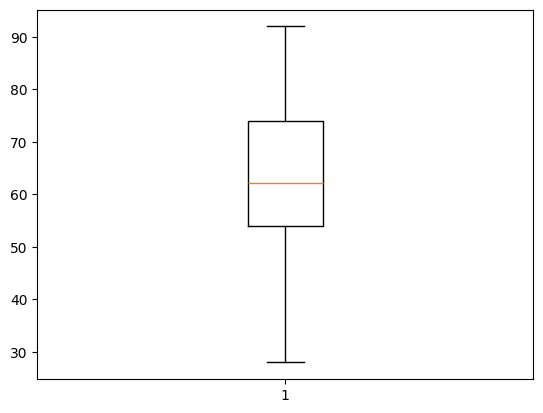

In [20]:
plt.boxplot(df['AI'])

In [21]:
#Outliers are dealt with.

In [22]:

Q1 = df['DSBDA'].quantile(0.25)
Q3 = df['DSBDA'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
lower, upper

(np.float64(26.5), np.float64(102.5))

In [23]:
df = df[~((df['DSBDA']<lower) | (df['DSBDA']>upper))]

In [24]:
#SKEWNESS

In [25]:
df['AI'].skew(), df['DSBDA'].skew()

(np.float64(-0.30351349152407303), np.float64(-0.2844792098511676))

In [26]:
df['AI'].max(), df['AI'].mean()

(np.float64(92.0), np.float64(63.09503745318352))

In [27]:
df['DSBDA'].max(), df['DSBDA'].mean()

(np.float64(95.0), np.float64(65.2078947368421))

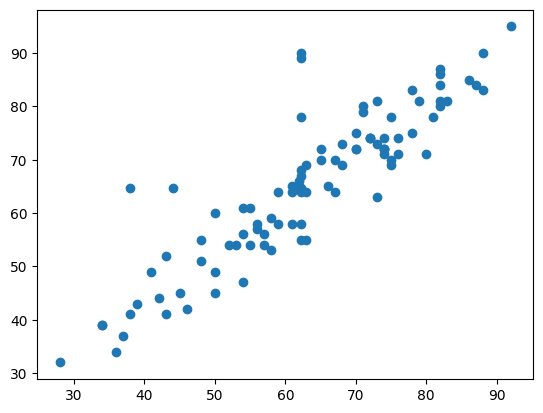

In [28]:
plt.scatter(x=df['AI'], y=df['DSBDA'])

In [29]:
df[['AI','DSBDA']].corr()

,AI,DSBDA
AI,1.000000,0.891242
DSBDA,0.891242,1.000000
